## Swing Trading Simulation

#### Hemant Thapa

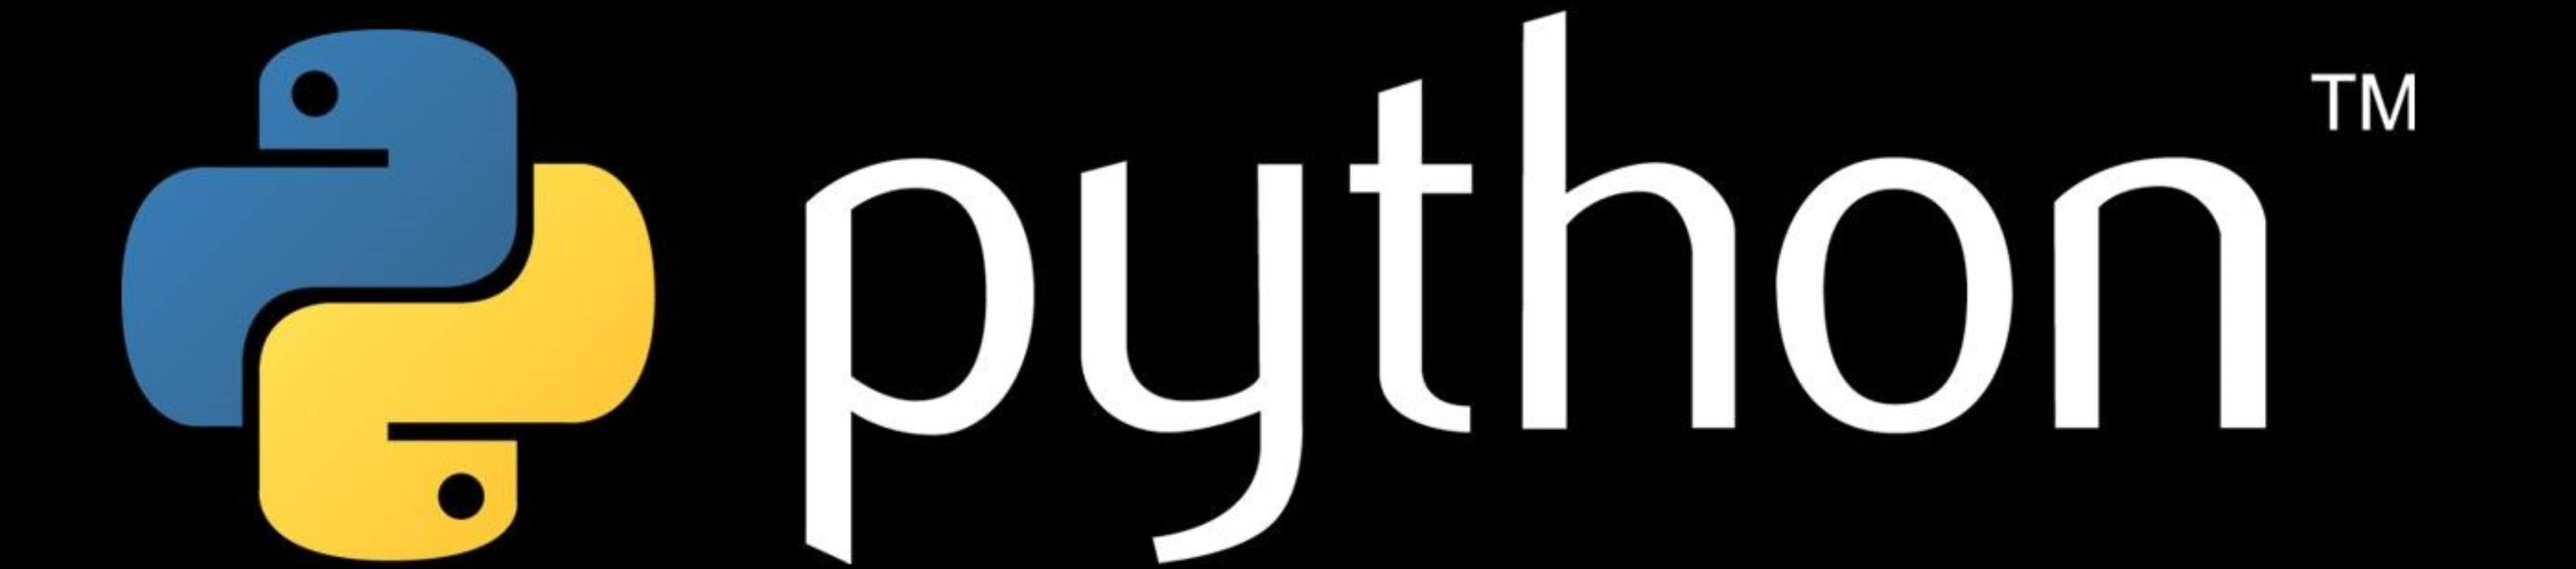

In [1]:
#laoding libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [2]:
#ticekr -> nvidia
ticker = 'NVDA'
currency = '$ - dollars'

In [3]:
#final date
end_date = datetime.today()
#initial date
start_date = end_date - timedelta(days=3*365)  

In [4]:
#nvidia data mining fro yfinance api
data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

[*********************100%%**********************]  1 of 1 completed


In [5]:
#top five rows and columns
data[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-22,147.747498,151.332504,143.250000,143.557495,143.234665,32588400
2021-02-23,140.752502,142.387497,133.895004,141.419998,141.101974,39178000
2021-02-24,141.227493,145.067505,137.559998,144.990005,144.663956,44832000
2021-02-25,140.455002,143.747498,132.162506,133.074997,132.775757,82443600
2021-02-26,137.524994,138.544998,133.610001,137.145004,136.836594,50093200


In [6]:
#last bottom rows and columns
data[-5:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-12,726.000000,746.109985,712.500000,722.479980,722.479980,61371000
2024-02-13,704.000000,734.500000,696.200012,721.280029,721.280029,60258000
2024-02-14,732.020020,742.359985,719.380005,739.000000,739.000000,50491700
2024-02-15,738.690002,739.750000,724.000000,726.580017,726.580017,42012200
2024-02-16,741.000000,744.020020,725.010010,726.130005,726.130005,49391800


In [7]:
#rows and columns
data.shape

(753, 6)

In [8]:
#size -> rows x columns
data.size

4518

In [9]:
# checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2021-02-22 to 2024-02-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       753 non-null    float64
 1   High       753 non-null    float64
 2   Low        753 non-null    float64
 3   Close      753 non-null    float64
 4   Adj Close  753 non-null    float64
 5   Volume     753 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.2 KB


In [10]:
#statical analysis
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,753.000000,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,269.160265,274.208831,264.092616,269.489396,269.306104,4.659549e+07
std,132.681123,134.424180,130.849959,132.907498,132.967323,1.712661e+07
min,109.709999,117.349998,108.129997,112.269997,112.191505,1.462760e+07
25%,167.220001,171.399994,164.070007,168.979996,168.776001,3.548290e+07
50%,223.089996,226.949997,218.899994,222.419998,222.086456,4.529550e+07
75%,323.670013,330.880005,314.209991,324.269989,323.823364,5.579920e+07
max,741.000000,746.109985,725.010010,739.000000,739.000000,1.543911e+08


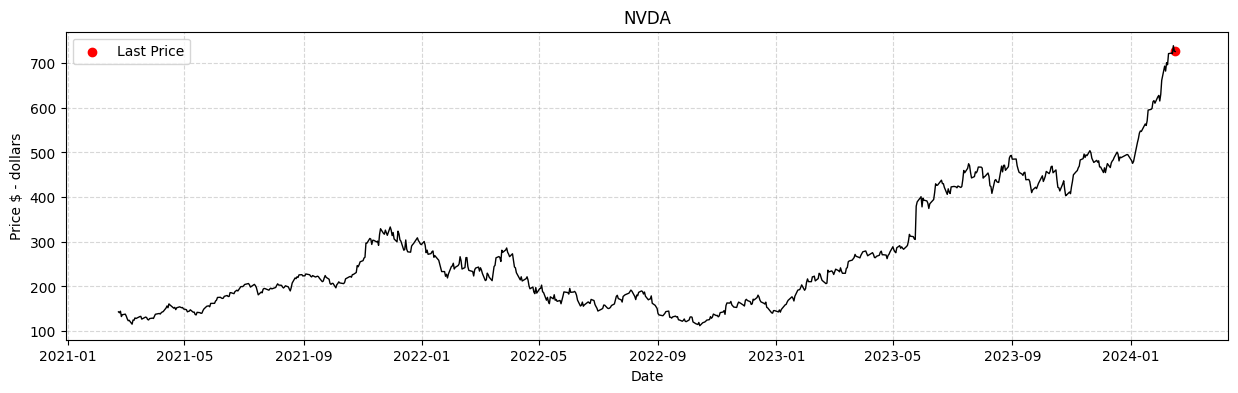

In [11]:
#plot nvidia chart
plt.figure(figsize=(15,4))
plt.plot(data.index, data['Adj Close'], lw=1, color='black')
plt.scatter(data.index[-1], data['Adj Close'].iloc[-1], color='red', label='Last Price')
plt.title(f"{ticker}")
plt.xlabel("Date")
plt.ylabel(f"Price {currency}")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

Buying can be represented mathematically as:

$ \text{Condition 1}: \quad P_c \leq 0.80 \times P_b \quad \text{or} \quad P_b = 0 $

$ \text{Condition 2}: \quad C > 0 $

- $ P_c $ = Current price
- $ P_b $ = Previous buy price
- $ C $ = Capital available for buying

```python
if (current_price <= 0.8 * buy_price or buy_price == 0) and capital > 0:


In [12]:
#if current price is 100 and buy price is 90
#current price
current_price = 100
#previous buy price
buy_price = 80
#total capital value
capital = 10000
if (current_price <= 0.8 * buy_price or buy_price == 0) and capital > 0:
    print("Buy shares")
else:
    print("Do not buy shares")

Do not buy shares


In [13]:
#if current price is 80 and buy price is 100
#current price
current_price = 80
#previous buy price
buy_price = 100
#total capital value
capital = 10000

if (current_price <= 0.8 * buy_price or buy_price == 0) and capital > 0:
    print("Buy shares")
else:
    print("Do not buy shares")

Buy shares


Selling can be represented mathematically as:

$ \text{Condition 1}: \quad P_c \geq 1.20 \times P_b \quad \text{and} \quad S > 0 $


- $ P_c $ = Current price
- $ P_b $ = Previous buy price
- $ S $ = Number of shares held


```python
if (current_price >= 1.2 * buy_price and shares > 0):

In [14]:
#if current price in market is 100 and previous buy price is 120
#current sell price
current_price = 100
#current buy price
buy_price = 120
#total share holding
shares = 50
if current_price >= 1.2 * buy_price and shares > 0:
    print("Sell shares")
else:
    print("Do not sell shares")

Do not sell shares


In [15]:
#if current price in market is 120 and previous buy price is 100
#current sell price
current_price = 120
#current buy price
buy_price = 100
#total share holding
shares = 50

if current_price >= 1.2 * buy_price and shares > 0:
    print("Sell shares")
else:
    print("Do not sell shares")

Sell shares


In [16]:
initial_price = data['Adj Close'].iloc[0]
growth_percentage = ((data['Adj Close'] - initial_price) / initial_price) * 100
print()
print(f"Total Growth of {ticker} in last {end_date - start_date} is {round(growth_percentage.iloc[-1],2)} % ")


Total Growth of NVDA in last 1095 days, 0:00:00 is 406.95 % 


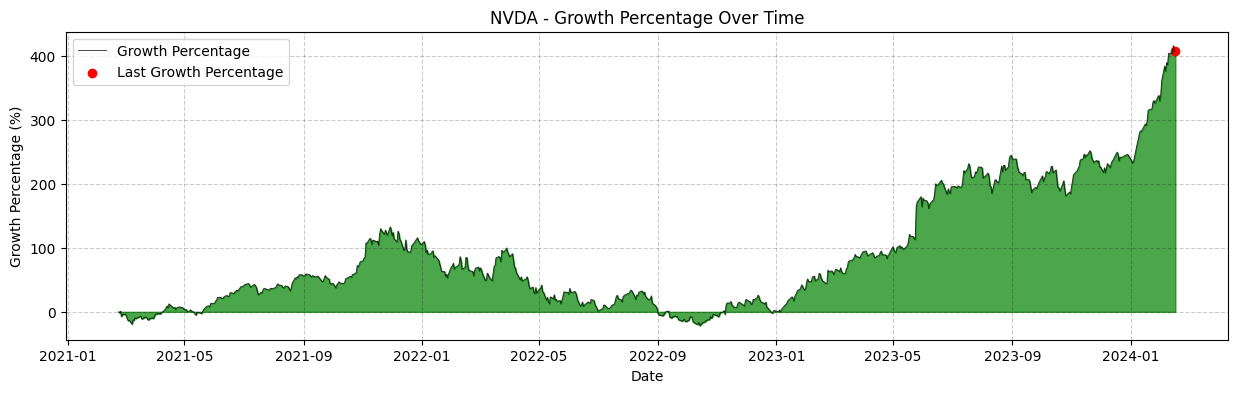

In [17]:
plt.figure(figsize=(15,4))
plt.plot(data.index, growth_percentage, lw=0.7, color='black', label='Growth Percentage', alpha=0.7)
plt.fill_between(data.index, growth_percentage, color='green', alpha=0.7)
plt.scatter(data.index[-1], growth_percentage.iloc[-1], color='red', label='Last Growth Percentage')
plt.title(f"{ticker} - Growth Percentage Over Time")
plt.xlabel("Date")
plt.ylabel("Growth Percentage (%)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.2, color='black')
plt.show()

In [18]:
#initial value of capital 
initial_capital = 100000
#swing percentage for buy and sell is 20 percent
swing_percent = 0.2
#total capital set to initial capital
capital = initial_capital
#initial value of shares
shares = 0
#initial value of share price
buy_price = 0
#profit and loss history
pnl_history = []
#dates bought and sold shares
dates = []  
#overall value of your portfolio
portfolio_values = []  

In [19]:
#iterating over historical data
for i in range(1, len(data)):
    #current price or today closing price of security 
    current_price = data['Adj Close'].iloc[i]
    #date index
    date = data.index[i] 
    
    #time to buy
    if (current_price <= (1 - swing_percent) * buy_price) or (buy_price == 0) and capital > 0:
        shares_to_buy = capital / current_price
        shares += shares_to_buy
        capital = 0
        buy_price = current_price
        print(f"Bought {shares:.2f} shares of {ticker} at {buy_price:.2f} on {date}")
        
    #time to sell
    elif current_price >= (1 + swing_percent) * buy_price and shares > 0:
        capital += shares * current_price
        shares = 0
        buy_price = 0
        print(f"Sold {shares:.2f} shares of {ticker} at {current_price:.2f} on {date}")
        
    #P&L
    pnl = capital + (shares * current_price) - initial_capital
    pnl_history.append(pnl)
    #portfolio value
    portfolio_value = capital + (shares * current_price)
    portfolio_values.append(portfolio_value)
    dates.append(date)

Bought 708.71 shares of NVDA at 141.10 on 2021-02-23 00:00:00
Sold 0.00 shares of NVDA at 169.37 on 2021-06-03 00:00:00
Bought 684.17 shares of NVDA at 175.45 on 2021-06-04 00:00:00
Sold 0.00 shares of NVDA at 219.21 on 2021-08-23 00:00:00
Bought 689.35 shares of NVDA at 217.56 on 2021-08-24 00:00:00
Sold 0.00 shares of NVDA at 263.61 on 2021-11-02 00:00:00
Bought 684.25 shares of NVDA at 265.58 on 2021-11-03 00:00:00
Sold 0.00 shares of NVDA at 329.36 on 2021-11-19 00:00:00
Bought 706.28 shares of NVDA at 319.08 on 2021-11-22 00:00:00
Bought 706.28 shares of NVDA at 250.32 on 2022-01-19 00:00:00
Bought 706.28 shares of NVDA at 194.91 on 2022-04-22 00:00:00
Bought 706.28 shares of NVDA at 155.85 on 2022-06-16 00:00:00
Sold 0.00 shares of NVDA at 188.74 on 2022-08-03 00:00:00
Bought 694.45 shares of NVDA at 191.96 on 2022-08-04 00:00:00
Bought 694.45 shares of NVDA at 150.79 on 2022-08-31 00:00:00
Bought 694.45 shares of NVDA at 116.62 on 2022-10-10 00:00:00
Sold 0.00 shares of NVDA at 

In [20]:
final_capital = capital + (shares * data['Adj Close'].iloc[-1])
print(f"Final portfolio value: {final_capital:.4f} pounds")

Final portfolio value: 453866.8658 pounds


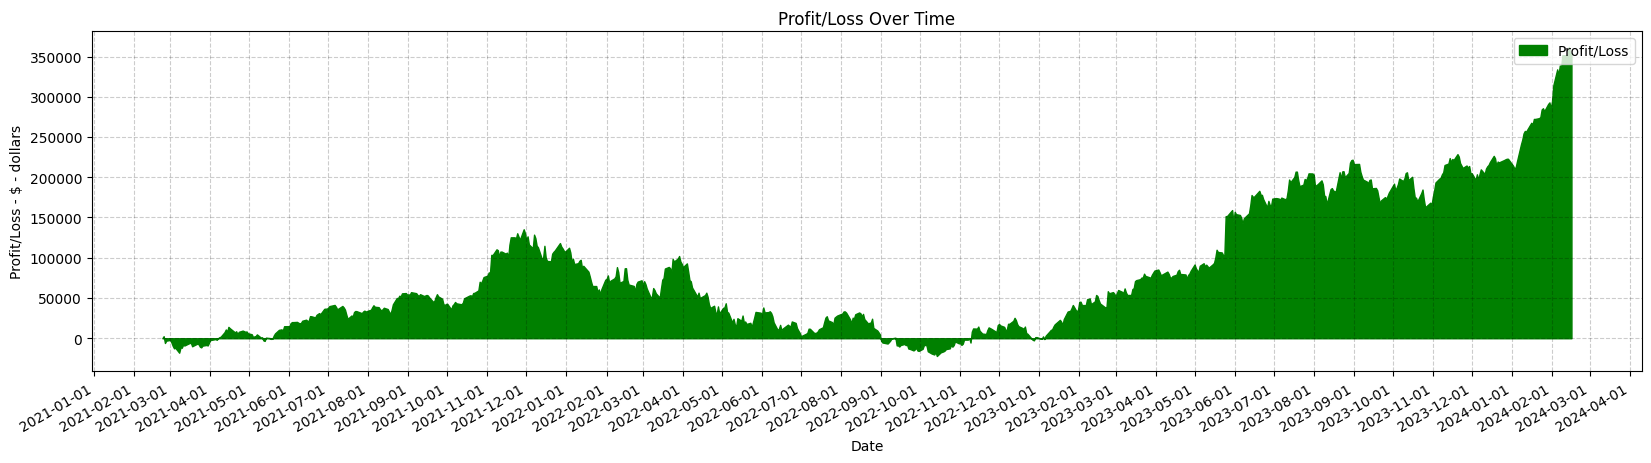

In [21]:
dates = mdates.date2num(data.index[1:])
plt.figure(figsize=(20, 5))
plt.fill_between(dates, pnl_history, label='Profit/Loss', color='green')
plt.title('Profit/Loss Over Time')
plt.xlabel('Date')
plt.ylabel(f'Profit/Loss - {currency}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.2, color='black')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  
plt.show()

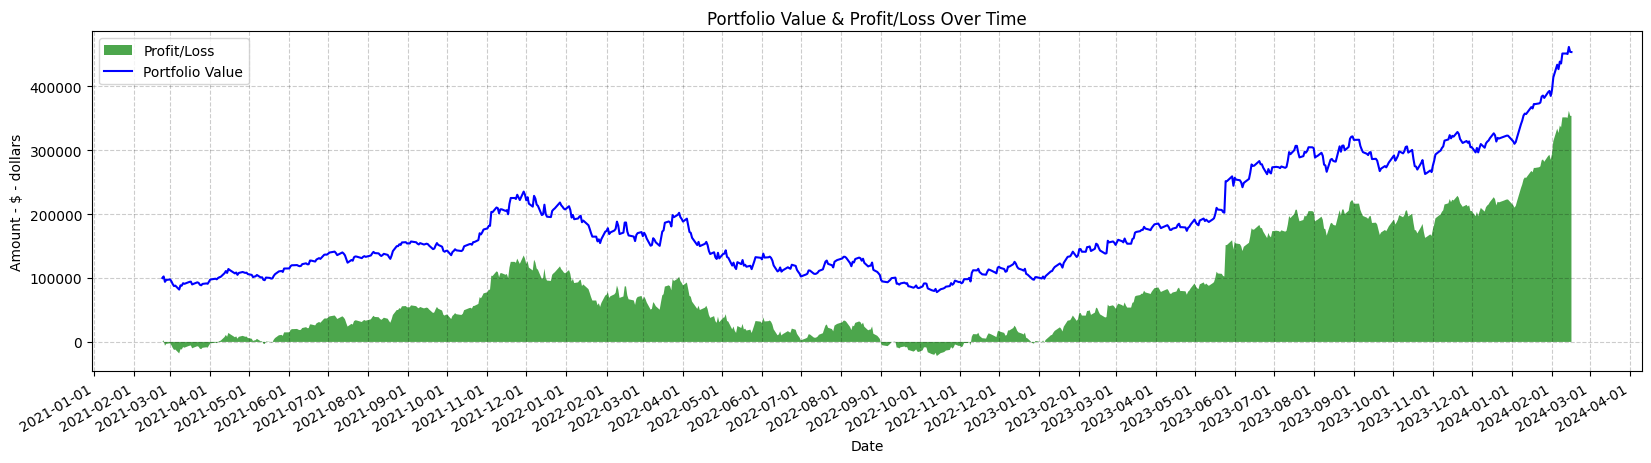

In [22]:
dates = mdates.date2num(data.index[1:])
plt.figure(figsize=(20, 5))
plt.stackplot(dates, pnl_history, labels=['Profit/Loss'], colors=['green'], alpha=0.7)
plt.plot(dates, portfolio_values, label='Portfolio Value', color='blue')
plt.title('Portfolio Value & Profit/Loss Over Time')
plt.xlabel('Date')
plt.ylabel(f'Amount - {currency}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.2, color='black')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  
plt.show()
plt.show()

### References: 

[Automate Your Swing Trading with Python: Improve Your Trading Strategy with Automation](https://medium.com/@nomadworld/automate-your-swing-trading-with-python-improve-your-trading-strategy-with-automation-f7dac04ae078)

[Generating Swing Trading Signals Using Donchian Strategy in Python](https://python.plainenglish.io/generating-swing-trading-signals-using-donchian-strategy-in-python-7aff3c9ce0a8)

[The VUMAN CHU Swing Trading Strategy: Python Tutorial](https://medium.com/@chris_42047/the-vuman-chu-swing-trading-strategy-python-tutorial-e7eba705aa48)
